In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rauf41/skin-cancer-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 308M/308M [00:54<00:00, 5.98MB/s] 

Extracting files...


Path to dataset files: /home/huzhengyu/.cache/kagglehub/datasets/rauf41/skin-cancer-image-dataset/versions/1


In [ ]:
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install jinja2

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import os
import seaborn as sns
import matplotlib.image as mpimg
import random

output_base_dir = "/data/huzhengyu/github_repo/tony_csml/csml-final-project/split_data"

train_dir = os.path.join(output_base_dir, 'train')
val_dir = os.path.join(output_base_dir, 'validation')
test_dir = os.path.join(output_base_dir, 'test')

# Count the number of images in each split and class
split_counts = defaultdict(dict)

for split, split_path in zip(['train', 'validation', 'test'], [train_dir, val_dir, test_dir]):
    print(f"Processing {split} directory: {split_path}")  # Debug: Verify the paths
    if not os.path.exists(split_path):
        print(f"Warning: {split_path} does not exist.")
        continue

    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            img_list = [img for img in os.listdir(class_path) if img.endswith('.jpg') or img.endswith('.png')]
            split_counts[split][class_name] = len(img_list)
            # Debug: Print class counts
            print(f"Class '{class_name}' in split '{split}' has {len(img_list)} images.")

# Create a DataFrame to show counts per class per split
split_counts_df = pd.DataFrame(split_counts).fillna(0).astype(int)

# Sort columns in the desired order: 'df', 'bkl', 'mel', 'vasc', 'nv'
desired_order = ['df', 'bkl', 'mel', 'vasc', 'nv', 'akiec', 'bcc']
existing_classes = [cls for cls in desired_order if cls in split_counts_df.index]
split_counts_df = split_counts_df.loc[existing_classes]

# Transpose the DataFrame so that classes are columns
split_counts_df = split_counts_df.T






Processing train directory: /data/huzhengyu/github_repo/tony_csml/csml-final-project/split_data/train
Class 'bkl' in split 'train' has 824 images.
Class 'df' in split 'train' has 86 images.
Class 'akiec' in split 'train' has 245 images.
Class 'bcc' in split 'train' has 385 images.
Class 'mel' in split 'train' has 834 images.
Class 'nv' in split 'train' has 5028 images.
Class 'vasc' in split 'train' has 106 images.
Processing validation directory: /data/huzhengyu/github_repo/tony_csml/csml-final-project/split_data/validation
Class 'bkl' in split 'validation' has 109 images.
Class 'df' in split 'validation' has 11 images.
Class 'akiec' in split 'validation' has 32 images.
Class 'bcc' in split 'validation' has 51 images.
Class 'mel' in split 'validation' has 111 images.
Class 'nv' in split 'validation' has 670 images.
Class 'vasc' in split 'validation' has 14 images.
Processing test directory: /data/huzhengyu/github_repo/tony_csml/csml-final-project/split_data/test
Class 'bkl' in split 't

/tmp/ipykernel_2299689/1256942296.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_counts_df, x='Class', y='Total Number of Images', palette='viridis')


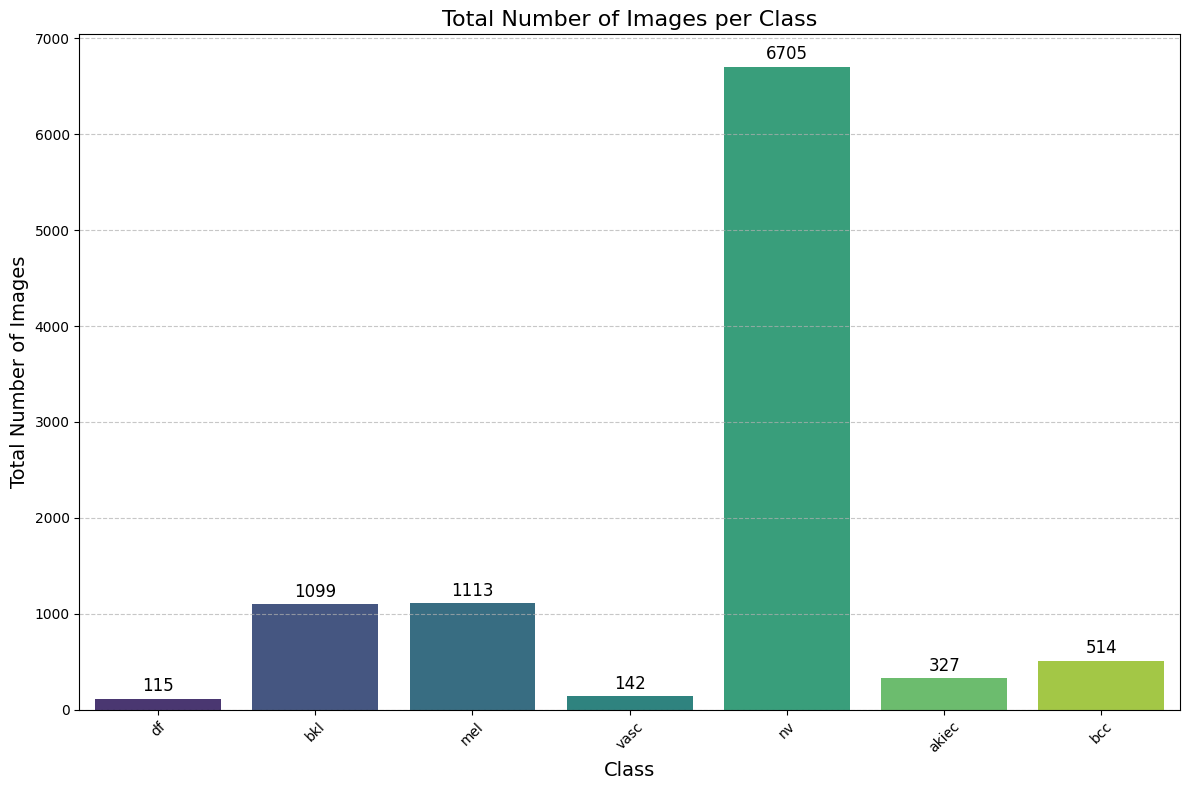

In [5]:
# Combine all dataset splits and plot the total counts as a bar chart using Seaborn
total_counts_df = split_counts_df.sum().reset_index()
total_counts_df.columns = ['Class', 'Total Number of Images']

plt.figure(figsize=(12, 8))
sns.barplot(data=total_counts_df, x='Class', y='Total Number of Images', palette='viridis')

# Add the total number of images at the top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12, color='black')

plt.title('Total Number of Images per Class', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Total Number of Images', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


,df,bkl,mel,vasc,nv,akiec,bcc
train,86,824,834,106,5028,245,385
validation,11,109,111,14,670,32,51
test,18,166,168,22,1007,50,78


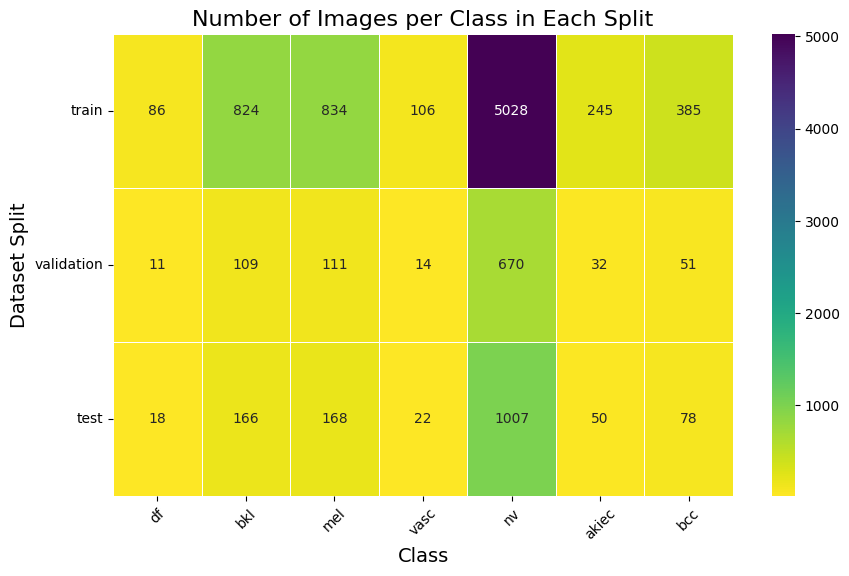

In [6]:
# Display the DataFrame as a styled table with a reversed color gradient
styled_table = split_counts_df.style.set_caption("Number of Images per Class in Each Split").background_gradient(cmap="viridis_r")
display(styled_table)

# Display the DataFrame as a heatmap using Seaborn with a reversed color gradient
plt.figure(figsize=(10, 6))
sns.heatmap(split_counts_df, annot=True, fmt="d", cmap="viridis_r", cbar=True, linewidths=.5)
plt.title('Number of Images per Class in Each Split', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Dataset Split', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


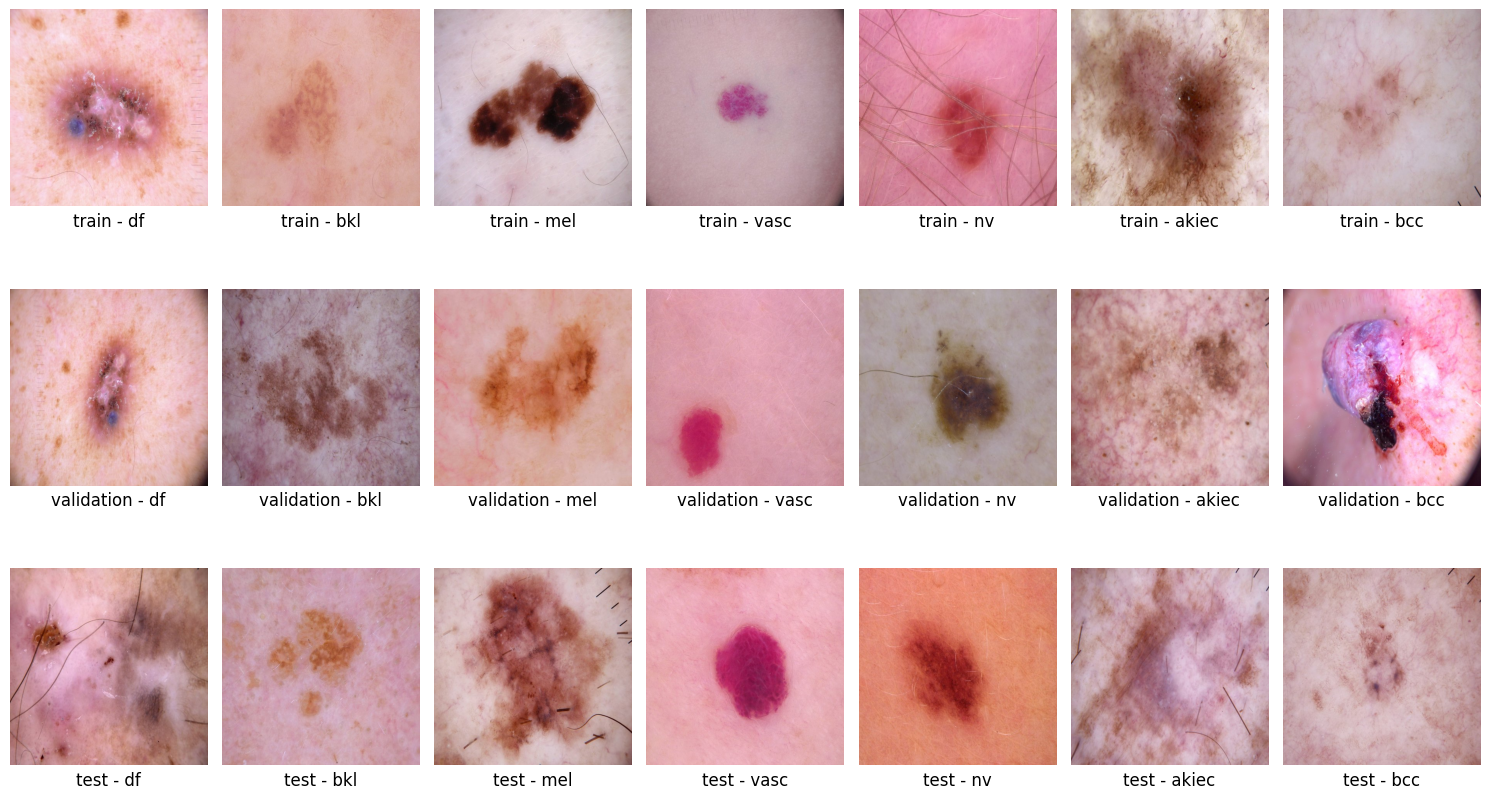

In [7]:
# Display a few sample images from each split
fig, axs = plt.subplots(3, 7, figsize=(15, 10))

class_order = existing_classes
split_paths = [train_dir, val_dir, test_dir]
split_labels = ['train', 'validation', 'test']

for i, split_path in enumerate(split_paths):
    for j, class_name in enumerate(class_order):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            image_list = [img for img in os.listdir(class_path) if img.endswith('.jpg') or img.endswith('.png')]
            if image_list:
                image_name = random.choice(image_list)
                img_path = os.path.join(class_path, image_name)
                img = mpimg.imread(img_path)
                axs[i, j].imshow(img)
                axs[i, j].axis('off')
                axs[i, j].text(0.5, -0.1, f"{split_labels[i]} - {class_name}", fontsize=12, ha='center', transform=axs[i, j].transAxes)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
